node count = 500
link count = 121


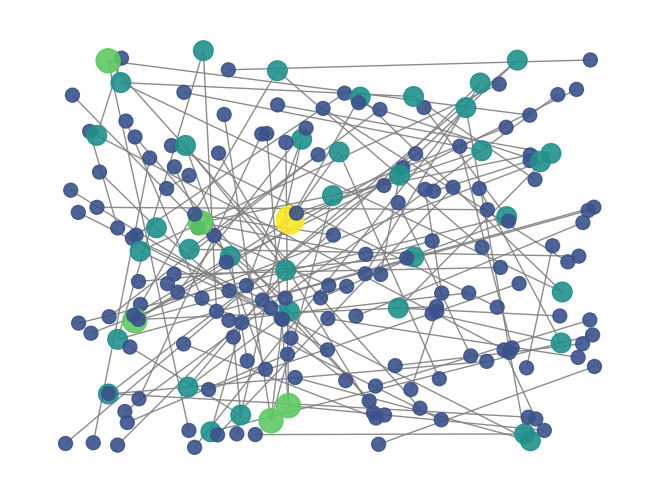

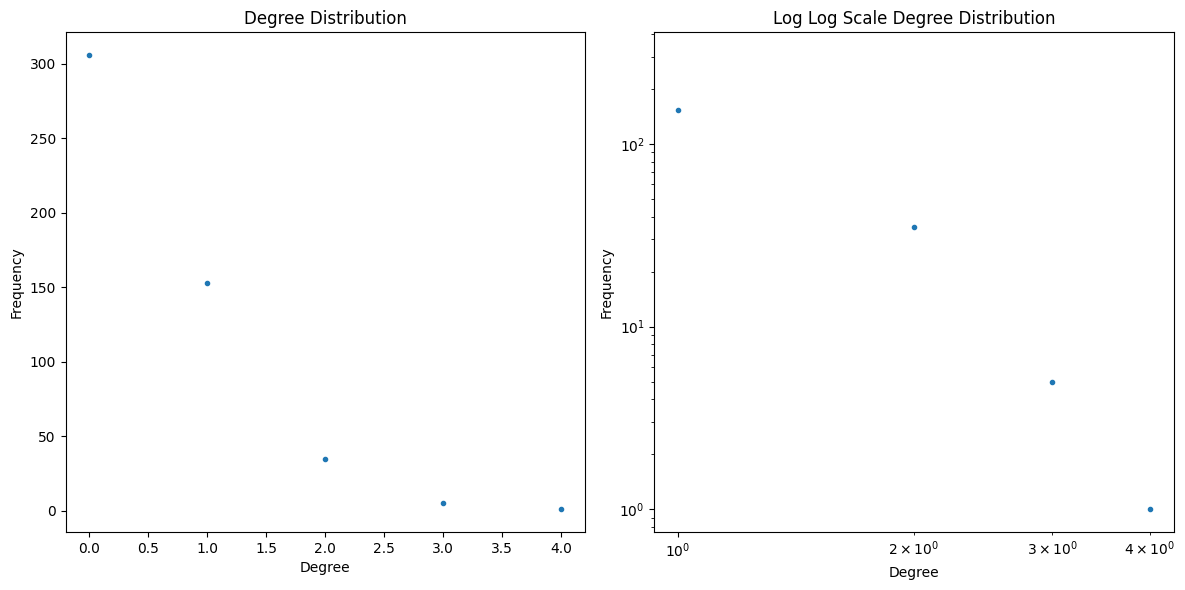

<ipython-input-1-5ee40812419f>:70: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  ks_statistic, p_value = ks_2samp(degree_counts, poisson_dist)


P-value: 1.0


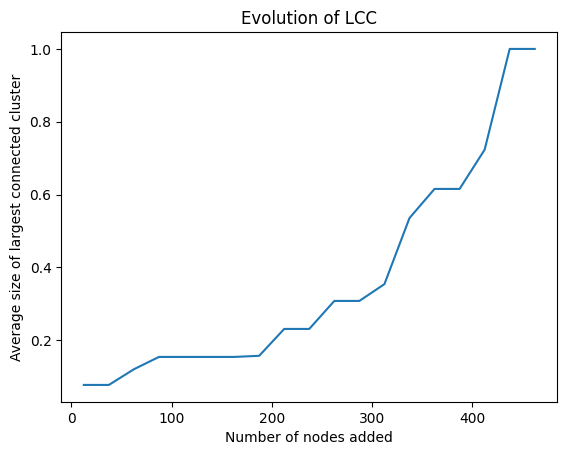

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import collections
from scipy.stats import ks_2samp
import math

def erng(n, p):
    G = nx.Graph()
    G.add_node(0)
    lcs = []
    for i in range(1, n):
        G.add_node(i)
        lc = max(nx.connected_components(G), key=len)
        lcs.append(len(lc))
        for j in range(i):
            if random.random() < p:
                G.add_edge(i, j)

    return G, lcs

num_nodes = 500
psubc = 1 / (2 * (num_nodes - 1))

# Generate ER network with growth
G1, lcs = erng(num_nodes, psubc)

p_inf = lcs[-1]
ar = np.array(lcs)
ra = ar/p_inf
lcs = ra.tolist()

node_count=G1.order()
print("node count =",node_count)

#link count
link_count=len(G1.edges())
print("link count =",link_count)
# degree calculation
degree=G1.degree()
degree_val=[v for k, v in degree]
node_size= [i*100 for i in degree_val]
pos = nx.random_layout(G1)
nx.draw(G1,pos,with_labels = False,alpha = 0.9, node_size =node_size , node_color= node_size, edge_color='grey')
plt.show()

degree_hist = nx.degree_histogram(G1)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(range(len(degree_hist)), degree_hist, '.')
axs[0].set_xlabel('Degree')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Degree Distribution')
axs[1].loglog(range(len(degree_hist)), degree_hist, '.')
axs[1].set_xlabel('Degree')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Log Log Scale Degree Distribution')
plt.tight_layout()
plt.show()

degree_counts = np.array(degree_hist)
degree_counts = degree_counts / sum(degree_counts)  # Convert to probabilities
mean_degree = sum(degree_val) / len(degree_val)

# Compute the theoretical Poisson distribution
poisson_dist = np.array([np.exp(-mean_degree) * (mean_degree ** k) / math.factorial(k) for k in range(len(degree_counts))])

# Perform the Kolmogorov-Smirnov test
ks_statistic, p_value = ks_2samp(degree_counts, poisson_dist)
print("P-value:", p_value)

bin_size = 25
num_bins = (num_nodes - 1) // bin_size
binned_nodes = []
binned_lcs = []
for i in range(num_bins):
    start_idx = i * bin_size
    end_idx = min((i + 1) * bin_size, num_nodes - 1)
    binned_nodes.append(start_idx + bin_size / 2)
    binned_lcs.append(np.mean(lcs[start_idx:end_idx]))

# Plot the binned data
plt.plot(binned_nodes, binned_lcs)
plt.xlabel('Number of nodes added')
plt.ylabel('Average size of largest connected cluster')
plt.title('Evolution of LCC')
plt.show()
